In [1]:
pip install facenet-pytorch

     |████████████████████████████████| 1.9 MB 5.3 MB/s 


In [34]:
from facenet_pytorch import MTCNN
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import save_image

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/Proiect-IAVA/our_new_dataset.zip" "/content"
!unzip our_new_dataset.zip
!rm our_new_dataset.zip

In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cuda:0


In [91]:
mtcnn = MTCNN(select_largest=False,
    image_size=128, margin=40, min_face_size=20,
    factor=0.7, thresholds=[0.8, 0.85, 0.85],
    post_process = True,
    keep_all = True,
    device=device
)

In [92]:
def collate_fn(x):
    return x[0]

dataset = datasets.ImageFolder('content/our_new_dataset')
loader = DataLoader(dataset, collate_fn=collate_fn, num_workers=1)

In [93]:
aligned = []
for x, y in loader:
    x_aligned, prob = mtcnn(x, return_prob=True)
    for i in range(len(x_aligned)):
      print(f'picture no {i+1}')
      if x_aligned[i] is not None:
          print('Face detected with probability: {:8f}'.format(prob[i]))
          aligned.append(x_aligned[i])

picture no 1
Face detected with probability: 0.996731
picture no 2
Face detected with probability: 0.988766
picture no 1
Face detected with probability: 1.000000
picture no 2
Face detected with probability: 0.999999
picture no 3
Face detected with probability: 0.999730
picture no 1
Face detected with probability: 0.999997
picture no 2
Face detected with probability: 0.999993
picture no 3
Face detected with probability: 0.999926
picture no 4
Face detected with probability: 0.999913
picture no 5
Face detected with probability: 0.999081
picture no 6
Face detected with probability: 0.998978
picture no 7
Face detected with probability: 0.998933
picture no 1
Face detected with probability: 0.996523
picture no 1
Face detected with probability: 0.999715
picture no 2
Face detected with probability: 0.999115
picture no 1
Face detected with probability: 0.999990
picture no 2
Face detected with probability: 0.999842
picture no 1
Face detected with probability: 0.999800
picture no 2
Face detected w

In [94]:
len(aligned)

68

In [95]:
aligned[0].size()

torch.Size([3, 128, 128])

In [96]:
aligned[0]

tensor([[[-0.9570, -0.9492, -0.9492,  ..., -0.3789, -0.8008, -0.9414],
         [-0.9570, -0.9414, -0.9414,  ..., -0.8398, -0.9023, -0.9258],
         [-0.9648, -0.9570, -0.9570,  ..., -0.8945, -0.9180, -0.9180],
         ...,
         [-0.9727, -0.9648, -0.9727,  ..., -0.8398, -0.8320, -0.8320],
         [-0.9727, -0.9648, -0.9648,  ..., -0.8086, -0.8164, -0.8242],
         [-0.9727, -0.9648, -0.9648,  ..., -0.8008, -0.8086, -0.8242]],

        [[-0.9570, -0.9492, -0.9492,  ..., -0.4414, -0.8477, -0.9805],
         [-0.9570, -0.9414, -0.9414,  ..., -0.8945, -0.9492, -0.9727],
         [-0.9648, -0.9570, -0.9570,  ..., -0.9336, -0.9492, -0.9570],
         ...,
         [-0.9883, -0.9805, -0.9883,  ..., -0.8398, -0.8320, -0.8320],
         [-0.9883, -0.9805, -0.9805,  ..., -0.8086, -0.8164, -0.8242],
         [-0.9883, -0.9805, -0.9805,  ..., -0.8008, -0.8086, -0.8242]],

        [[-0.9570, -0.9492, -0.9492,  ..., -0.4805, -0.8867, -0.9883],
         [-0.9570, -0.9414, -0.9414,  ..., -0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

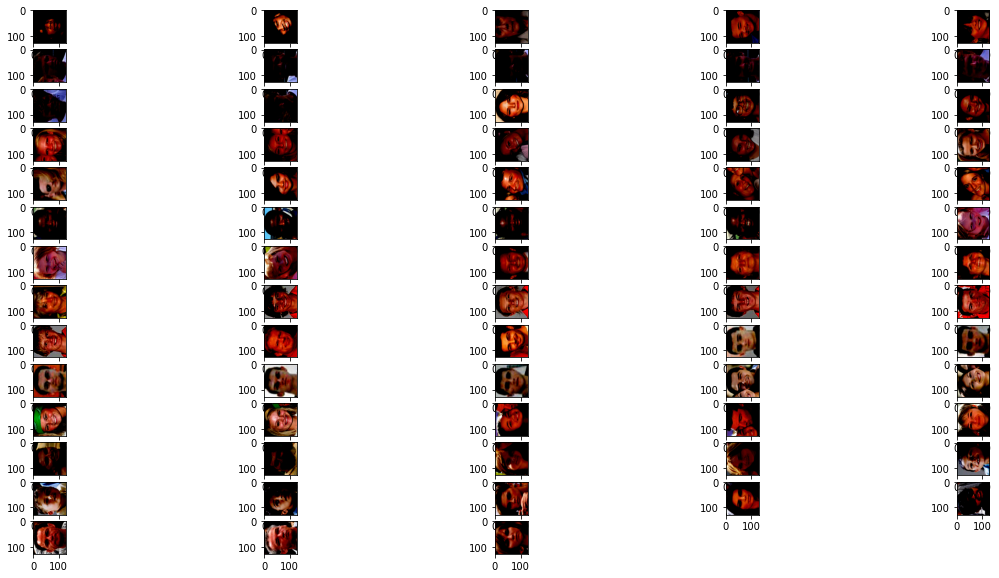

In [97]:
plt.figure(figsize=(20, 10))
columns = 5
for i, image in enumerate(aligned):
    plt.subplot(len(aligned) / columns + 1, columns, i + 1)
    plt.imshow(np.transpose(image.cpu().numpy()))

In [ ]:
!mkdir 'content/faces'

In [98]:
for i, image in enumerate(aligned):
    save_image(image, f'content/faces/img{i+1}.png')

In [102]:
!cp -r "content/faces/" "/content/drive/MyDrive/Proiect-IAVA"